# Modulation Classification

Developing AutoML Model for AWGN Channel for Modulation Classification. SNR Ratio's(in dB) of Channel are $[-15,-10,-5,0,5,10,15,20,25,30]$.

**Data Generation:**
Data is generated using MatLab's Communication Toolbox for Modulation Schemes QPSK, 16-QAM, 64-QAM for SNR Ratio's (in dB) $[-15,-10,-5,0,5,10,15,20,25,30]$ when signal is transmitted through Channels AWGN and Rayleigh Channels.

**Modulation Classification:**
We will use AutoML to creae a classifer that predicts Modulation Scheme depending on In-Phase and Quadrature-Phase Components at the Receiver's End.

## Imports

### Importing Data

Files are uploaded in Google Drive. Notebook is connected to Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Modulation-Classification/Synthetic\ Datasets/AutoML

Mounted at /gdrive
/gdrive/My Drive/Modulation-Classification/Synthetic Datasets/AutoML


### Importing Libraries

We will be using AutoKeras for generating AutoML Models.
Source of Documentation: [https://autokeras.com/](https://autokeras.com/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sns
import scipy.io
import os

# Importing Preprocessing Libraries
from Import_Functions import ImportData,ImportDatasets
from Plot_Results import EvaluateData, PlotResults

# AutoML Libraries
!pip3 install autokeras
import autokeras as ak

# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input
from tensorflow.keras.models import Model

     |████████████████████████████████| 174kB 7.4MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=f28d602fdf8c5419f240c173d540140a8f7b8104533217808746210a50a72f40
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=1c8e1ae21e291e5911677d693f28a8a9d95e8c356fae27c59f9567635c4145d9
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


## AutoML MLP Model for AWGN Channel

For AWGN Channel, Input Dimensions is $(2,)$

### Importing Data and Creating Classifier

Importing Data

In [3]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('AWGN')

Creating a Classifier

In [4]:
AWGNClassifier = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=3,
    loss='categorical_crossentropy',
    num_classes=3)

AWGNClassifier.fit(X_Train, y_Train, epochs=15, batch_size=64, validation_split=0.1)

Trial 3 Complete [00h 00m 14s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 50s
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
469/469 [==============================] - 1s 2ms/step - loss: 0.8271 - accuracy: 0.8057
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.9777 - accuracy: 0.6046
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.7727 - accuracy: 0.7076
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.6650 - accuracy: 0.7309
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.6179 - accuracy: 0.7398
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.5957 - accuracy: 0.7473
Epoch 7/15
469/469 [==============================] - 1s 2ms/step - loss: 0.5812 - accuracy: 0.7484
Epoch 8/15
469/469 [==============================] - 1s 2ms/step - loss: 0.5945 - accuracy: 0.7535
Epoch 9/15
469/469 [==============================

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 2)                 0         
_________________________________________________________________
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense (Dense)                (None, 32)                96        
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

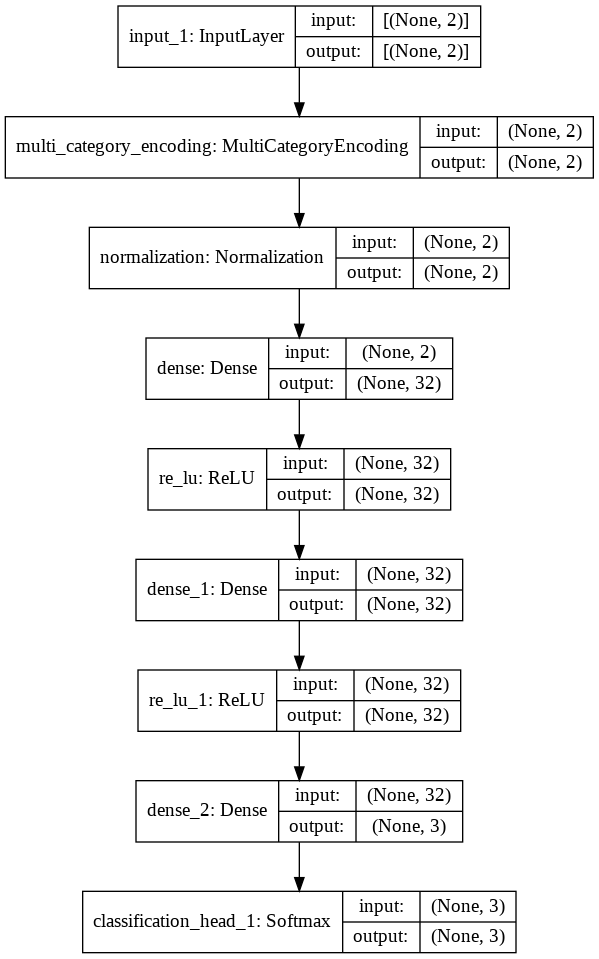

In [5]:
AWGN_Model = AWGNClassifier.export_model()
AWGN_Model.summary()
tf.keras.utils.plot_model(AWGN_Model, to_file='../Models/AWGN_Model_MLP.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [6]:
AWGN_Model.fit(X_Train, y_Train, epochs=100, batch_size=512, validation_split=0.1,shuffle=True)

Epoch 1/100
53/53 [==============================] - 1s 6ms/step - loss: 1.2184 - accuracy: 0.3856 - val_loss: 0.3327 - val_accuracy: 0.8847
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.8647 - val_loss: 0.6181 - val_accuracy: 0.7413
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8421 - val_loss: 0.6047 - val_accuracy: 0.7413
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8423 - val_loss: 0.5998 - val_accuracy: 0.7413
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8429 - val_loss: 0.6019 - val_accuracy: 0.7413
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8466 - val_loss: 0.5963 - val_accuracy: 0.7413
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8554 - val_loss: 0.5883 - val_accuracy: 0.7413
Epoch 8/100
5

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3574333190917969
SNR: -10 Accuracy: 0.39910000562667847
SNR: -5 Accuracy: 0.49106666445732117
SNR: 0 Accuracy: 0.5857666730880737
SNR: 5 Accuracy: 0.6592666506767273
SNR: 10 Accuracy: 0.7355666756629944
SNR: 15 Accuracy: 0.8115666508674622
SNR: 20 Accuracy: 0.8839666843414307
SNR: 25 Accuracy: 0.9180333614349365
SNR: 30 Accuracy: 0.9185333251953125


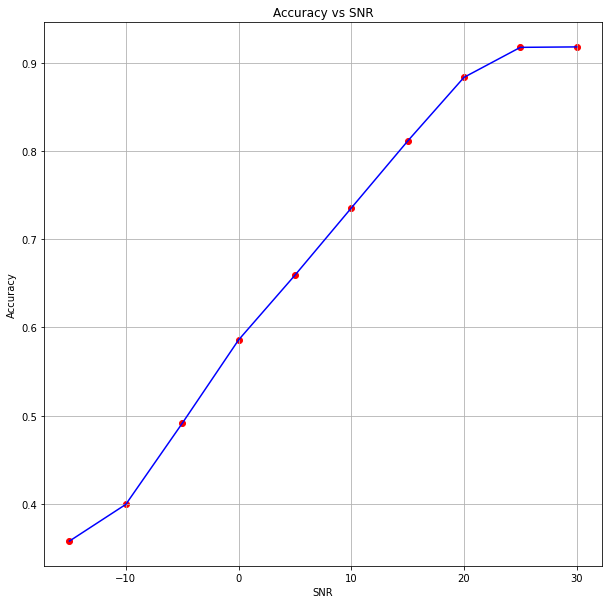

In [7]:
EvaluateData(AWGN_Model, X_Valid, y_Valid, "../Results/AWGN_Accuracy_MLP.jpg")

Save Model

In [8]:
AWGN_Model.save("../Models/AWGN_MLP.h5")

## AutoML CNN Model for AWGN Channel

For AWGN Channel, Input Dimensions is $(100,2)$

### Importing Data and Creating Classifier

Importing Data

In [9]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('AWGN')

X_Train = X_Train.reshape(-1,100,2)
y_Train = y_Train[::100]
for snr in [-15,-10,-5,0,5,10,15,20,25,30]:
    X_Valid[snr] = X_Valid[snr].reshape(-1,100,2)
    y_Valid[snr] = y_Valid[snr][::100]

Creating a Classifier

In [10]:
AWGNClassifier = ak.ImageClassifier(
    overwrite=True,
    max_trials=1,
    loss='categorical_crossentropy',
    num_classes=3)

AWGNClassifier.fit(X_Train, y_Train, epochs=15, batch_size=64, validation_split=0.1)

Trial 1 Complete [00h 00m 32s]
val_loss: 0.5041255354881287

Best val_loss So Far: 0.5041255354881287
Total elapsed time: 00h 00m 32s
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
5/5 [==============================] - 1s 36ms/step - loss: 1.3304 - accuracy: 0.3133
Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 1.0323 - accuracy: 0.5188
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 1.0595 - accuracy: 0.1532
Epoch 4/15
5/5 [==============================] - 0s 5ms/step - loss: 1.1129 - accuracy: 0.1476
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: 1.1269 - accuracy: 0.1476
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.1025 - accuracy: 0.1476
Epoch 7/15
5/5 [==============================] - 0s 5ms/step - loss: 1.0662 - accuracy: 0.1476
Epoch 8/15
5/5 [==============================] - 0s 5ms/step - loss: 1.0214 - accuracy: 0.1476
Epoch 9/15
5/5 [==============================] - 0s 4ms/st

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 100, 2, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 100, 2, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 64)         0     

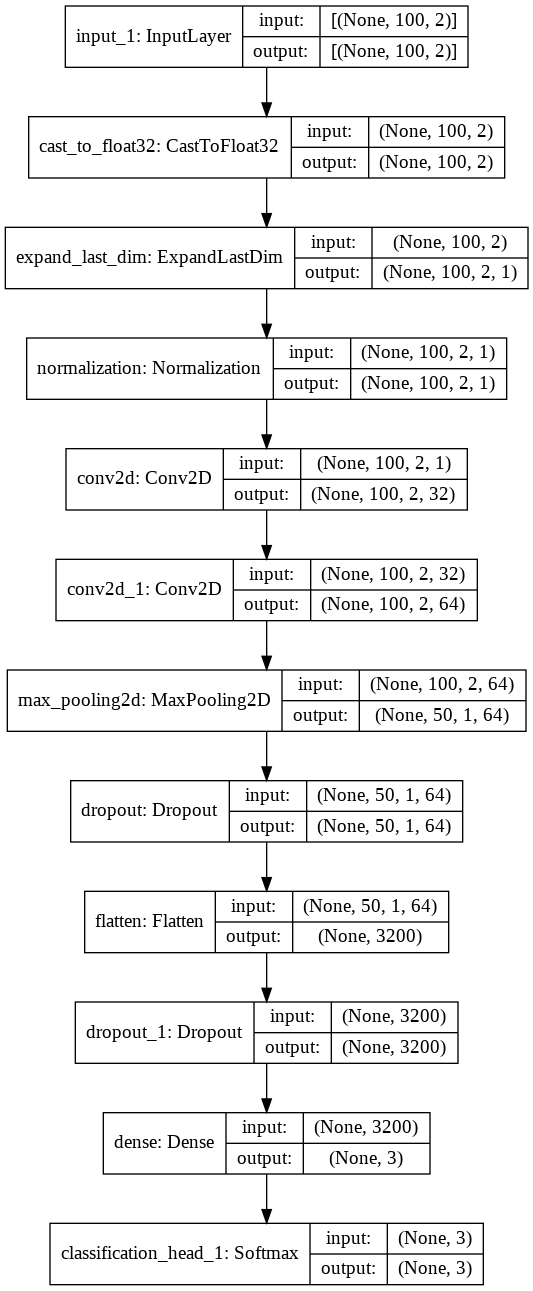

In [11]:
AWGN_Model = AWGNClassifier.export_model()
AWGN_Model.summary()
tf.keras.utils.plot_model(AWGN_Model, to_file='../Models/AWGN_Model_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model



In [12]:
AWGN_Model.fit(X_Train, y_Train, epochs=25, batch_size=16, validation_split=0.1,shuffle=True)

Epoch 1/25
17/17 [==============================] - 1s 23ms/step - loss: 0.7893 - accuracy: 0.7333 - val_loss: 0.3042 - val_accuracy: 1.0000
Epoch 2/25
17/17 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.8111 - val_loss: 0.3200 - val_accuracy: 1.0000
Epoch 3/25
17/17 [==============================] - 0s 5ms/step - loss: 0.5795 - accuracy: 0.9519 - val_loss: 0.2134 - val_accuracy: 1.0000
Epoch 4/25
17/17 [==============================] - 0s 5ms/step - loss: 0.3502 - accuracy: 0.9926 - val_loss: 0.0732 - val_accuracy: 1.0000
Epoch 5/25
17/17 [==============================] - 0s 5ms/step - loss: 0.1416 - accuracy: 0.9963 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 6/25
17/17 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/25
17/17 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 8/25
17/17 [=

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3333333432674408
SNR: -10 Accuracy: 0.3333333432674408
SNR: -5 Accuracy: 0.6666666865348816
SNR: 0 Accuracy: 0.9800000190734863
SNR: 5 Accuracy: 1.0
SNR: 10 Accuracy: 1.0
SNR: 15 Accuracy: 1.0
SNR: 20 Accuracy: 1.0
SNR: 25 Accuracy: 1.0
SNR: 30 Accuracy: 1.0


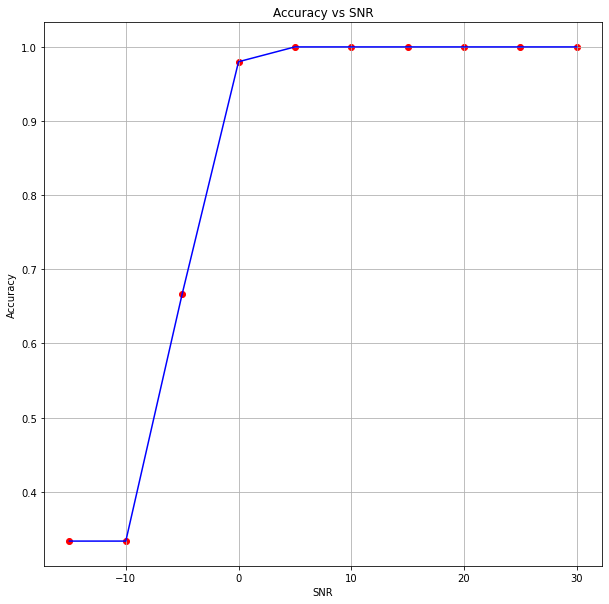

In [13]:
EvaluateData(AWGN_Model, X_Valid, y_Valid, "../Results/AWGN_Accuracy_CNN.jpg")

Save Model

In [14]:
AWGN_Model.save("../Models/AWGN_CNN.h5")

## AutoML CNN Model for Rayleigh Channel of Channel-Length = 2

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier


Importing Data

In [15]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=2)

Creating a Classifier

In [16]:
RayleighClassifier = ak.ImageClassifier(
    overwrite=True,
    max_trials=1,
    loss='categorical_crossentropy',
    num_classes=3)

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=16, validation_split=0.1)

Trial 1 Complete [00h 00m 15s]
val_loss: 0.0005859827506355941

Best val_loss So Far: 0.0005859827506355941
Total elapsed time: 00h 00m 15s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1526 - accuracy: 0.9798
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3250 - accuracy: 0.8901
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.7217 - accuracy: 0.8875
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4871 - accuracy: 0.8847
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3492 - accuracy: 0.9165
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 100, 2, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 100, 2, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 64)         0     

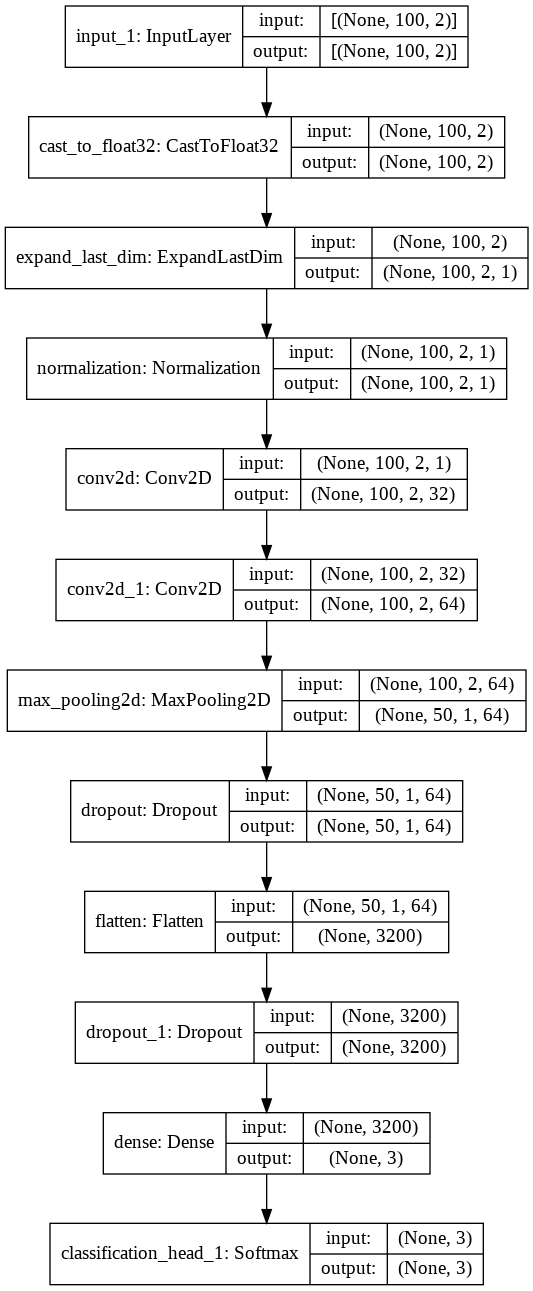

In [17]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=2_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [18]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=16, validation_split=0.2,shuffle=True)

Epoch 1/25
750/750 [==============================] - 3s 3ms/step - loss: 0.0429 - accuracy: 0.9857 - val_loss: 6.0890e-05 - val_accuracy: 1.0000
Epoch 2/25
750/750 [==============================] - 2s 3ms/step - loss: 1.5378e-05 - accuracy: 1.0000 - val_loss: 1.1058e-05 - val_accuracy: 1.0000
Epoch 3/25
750/750 [==============================] - 2s 3ms/step - loss: 6.5797e-06 - accuracy: 1.0000 - val_loss: 4.4931e-06 - val_accuracy: 1.0000
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 2.8187e-06 - accuracy: 1.0000 - val_loss: 2.1340e-06 - val_accuracy: 1.0000
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 1.0719e-06 - accuracy: 1.0000 - val_loss: 1.0401e-06 - val_accuracy: 1.0000
Epoch 6/25
750/750 [==============================] - 2s 3ms/step - loss: 7.9418e-07 - accuracy: 1.0000 - val_loss: 5.2007e-07 - val_accuracy: 1.0000
Epoch 7/25
750/750 [==============================] - 2s 3ms/step - loss: 1.1613e-06 - accuracy: 1.0000 

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3948666751384735
SNR: -10 Accuracy: 0.6585333347320557
SNR: -5 Accuracy: 0.996066689491272
SNR: 0 Accuracy: 0.9998666644096375
SNR: 5 Accuracy: 1.0
SNR: 10 Accuracy: 1.0
SNR: 15 Accuracy: 1.0
SNR: 20 Accuracy: 1.0
SNR: 25 Accuracy: 1.0
SNR: 30 Accuracy: 1.0


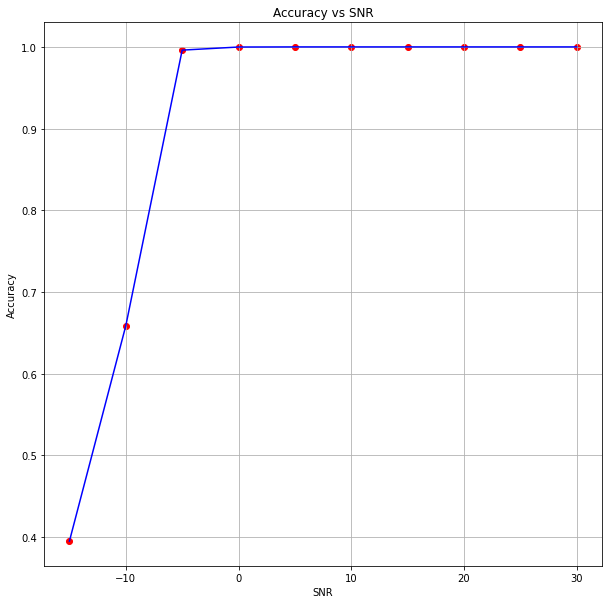

In [19]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=2_CNN.jpg")

Save Model

In [20]:
Rayleigh_Model.save("../Models/Rayleigh_L=2_CNN.h5")

## AutoML CNN Model for Rayleigh Channel of Channel-Length = 3

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Classifier

In [21]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=3)

Creating a Classifier

In [22]:
RayleighClassifier = ak.ImageClassifier(
    overwrite=True,
    max_trials=1,
    loss='categorical_crossentropy',
    num_classes=3)

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=16, validation_split=0.1)

Trial 1 Complete [00h 00m 15s]
val_loss: 0.0020707636140286922

Best val_loss So Far: 0.0020707636140286922
Total elapsed time: 00h 00m 15s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1340 - accuracy: 0.9811
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4408 - accuracy: 0.8017
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.5301 - accuracy: 0.8834
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4720 - accuracy: 0.8853
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4926 - accuracy: 0.8844
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 100, 2, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 100, 2, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 64)         0     

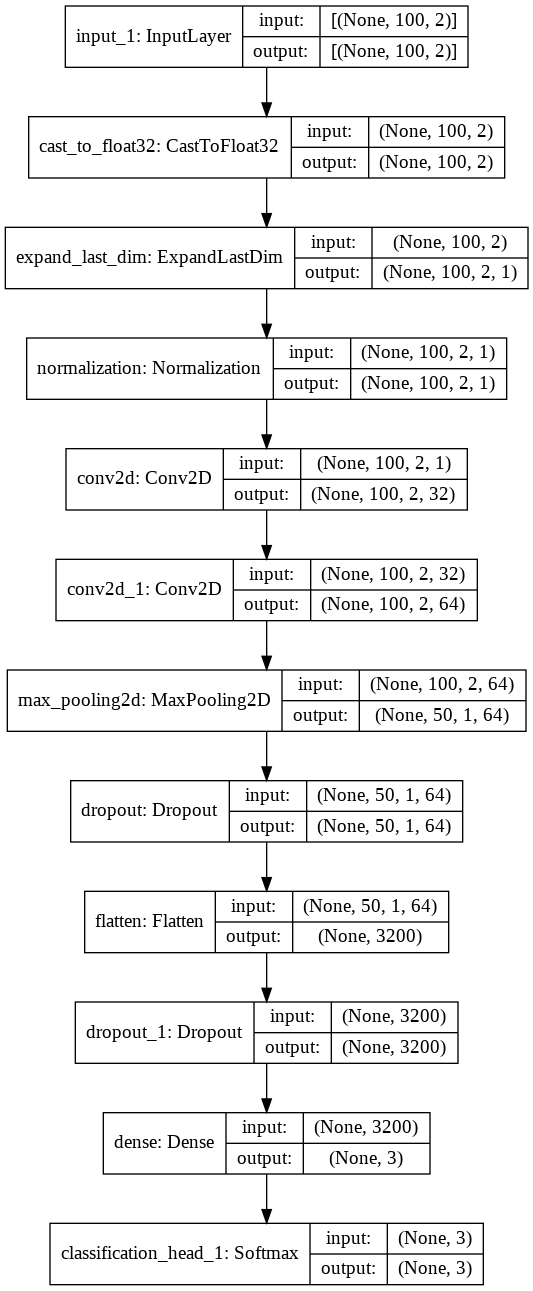

In [23]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=3_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [24]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=16, validation_split=0.2,shuffle=True)

Epoch 1/25
750/750 [==============================] - 3s 3ms/step - loss: 0.3719 - accuracy: 0.9093 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 7.3237e-04 - val_accuracy: 1.0000
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 5.5493e-04 - val_accuracy: 1.0000
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 2.2986e-04 - val_accuracy: 1.0000
Epoch 6/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 1.0369e-04 - val_accuracy: 1.0000
Epoch 7/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 1.9387e-05 - val_acc

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3333333432674408
SNR: -10 Accuracy: 0.3333333432674408
SNR: -5 Accuracy: 0.3333333432674408
SNR: 0 Accuracy: 0.6344666481018066
SNR: 5 Accuracy: 0.7113999724388123
SNR: 10 Accuracy: 0.9780666828155518
SNR: 15 Accuracy: 0.9998000264167786
SNR: 20 Accuracy: 1.0
SNR: 25 Accuracy: 0.9999333620071411
SNR: 30 Accuracy: 1.0


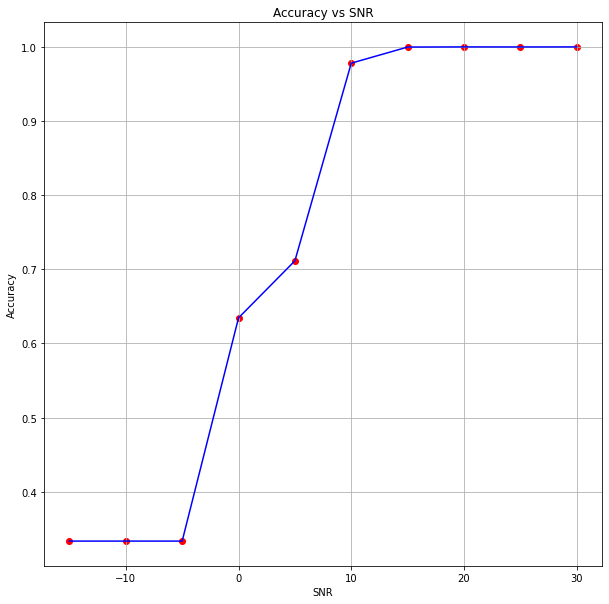

In [25]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=3_CNN.jpg")

Save Model

In [26]:
Rayleigh_Model.save("../Models/Rayleigh_L=3_CNN.h5")

## AutoML RNN Model for Rayleigh Channel of Channel-Length = 2

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier


Importing Data

In [27]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=2)

Creating a Classifier

In [28]:
input_node = ak.Input()
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=False,
                       layer_type='lstm')(input_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RayleighClassifier = ak.AutoModel(inputs=input_node,
                                  outputs=output_node, 
                                  overwrite=True,
                                  max_trials=3)

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=16, validation_split=0.1)

Trial 3 Complete [00h 00m 42s]
val_loss: 0.0

Best val_loss So Far: 0.0
Total elapsed time: 00h 02m 09s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
938/938 [==============================] - 10s 8ms/step - loss: 0.1315 - accuracy: 0.9744
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.5230 - accuracy: 0.8674
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.3723 - accuracy: 0.8453
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.3961 - accuracy: 0.9205
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.2185 - accuracy: 0.9020


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100, 2)            40        
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 2)            40        
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               102912    
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0     

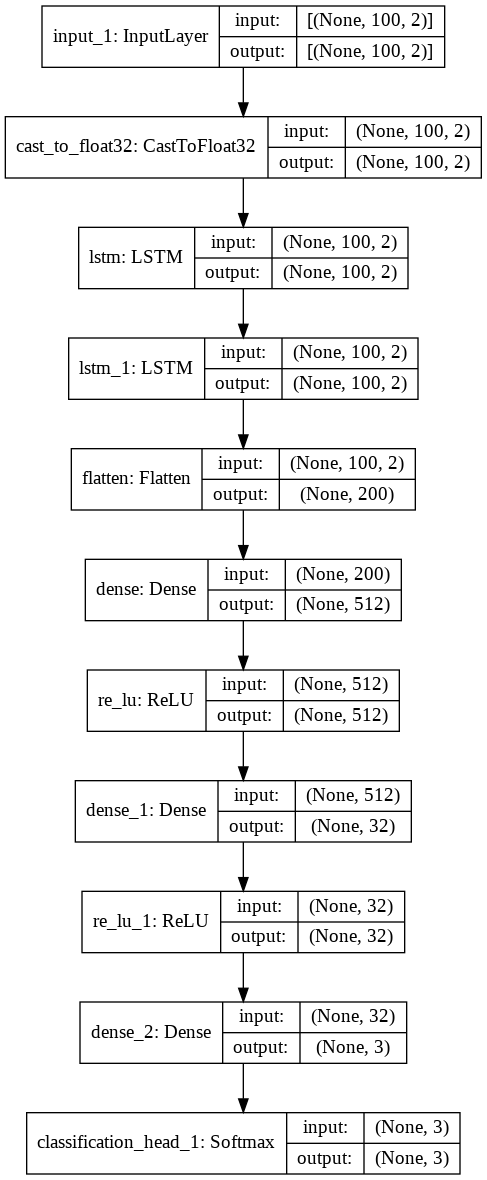

In [29]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=2_RNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [30]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=16, validation_split=0.2,shuffle=True)

Epoch 1/25
750/750 [==============================] - 10s 10ms/step - loss: 0.1573 - accuracy: 0.9369 - val_loss: 6.6332e-04 - val_accuracy: 1.0000
Epoch 2/25
750/750 [==============================] - 7s 9ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 3.6696e-04 - val_accuracy: 1.0000
Epoch 3/25
750/750 [==============================] - 7s 9ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 3.6124e-04 - val_accuracy: 1.0000
Epoch 4/25
750/750 [==============================] - 7s 9ms/step - loss: 6.6472e-04 - accuracy: 0.9998 - val_loss: 4.2275e-05 - val_accuracy: 1.0000
Epoch 5/25
750/750 [==============================] - 7s 9ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 6/25
750/750 [==============================] - 7s 9ms/step - loss: 3.8954e-04 - accuracy: 0.9999 - val_loss: 8.2130e-06 - val_accuracy: 1.0000
Epoch 7/25
750/750 [==============================] - 7s 9ms/step - loss: 4.4495e-05 - accuracy: 1.0000 - val_loss: 3.

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.33340001106262207
SNR: -10 Accuracy: 0.37586668133735657
SNR: -5 Accuracy: 0.714733362197876
SNR: 0 Accuracy: 0.9789333343505859
SNR: 5 Accuracy: 0.9994000196456909
SNR: 10 Accuracy: 0.9998666644096375
SNR: 15 Accuracy: 0.9998666644096375
SNR: 20 Accuracy: 0.9998000264167786
SNR: 25 Accuracy: 0.9998666644096375
SNR: 30 Accuracy: 1.0


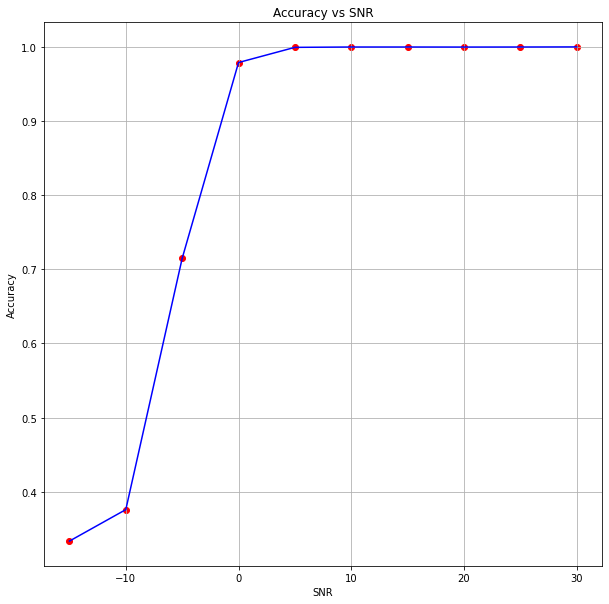

In [31]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=2_RNN.jpg")

Save Model

In [32]:
Rayleigh_Model.save("../Models/Rayleigh_L=2_RNN.h5")

## AutoML RNN Model for Rayleigh Channel of Channel-Length = 3

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [33]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=3)

Creating a Classifier

In [34]:
input_node = ak.Input()
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=False,
                       layer_type='lstm')(input_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RayleighClassifier = ak.AutoModel(inputs=input_node,
                                  outputs=output_node, 
                                  overwrite=True,
                                  max_trials=3)

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=16, validation_split=0.1)

Trial 3 Complete [00h 00m 28s]
val_loss: 0.5770130157470703

Best val_loss So Far: 1.463283297198359e-06
Total elapsed time: 00h 01m 23s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.3849 - accuracy: 0.9120
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 2.0870 - accuracy: 0.5991
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.7575 - accuracy: 0.7589
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.5872 - accuracy: 0.7841
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.5852 - accuracy: 0.8016


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100, 2)            40        
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                6432      
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0     

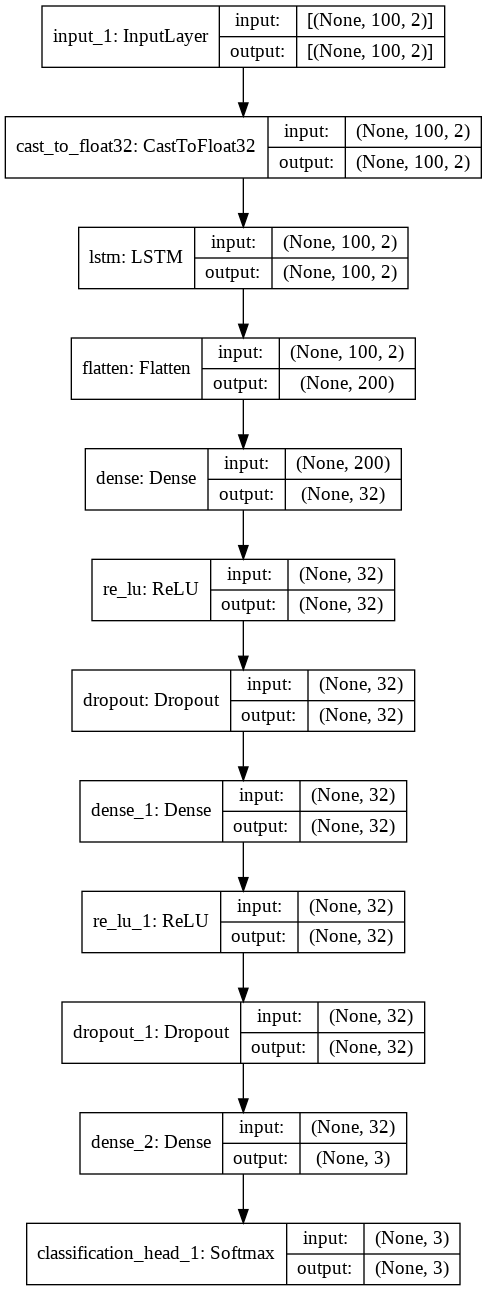

In [35]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=3_RNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [36]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=16, validation_split=0.2,shuffle=True)

Epoch 1/25
750/750 [==============================] - 6s 7ms/step - loss: 0.7354 - accuracy: 0.5533 - val_loss: 0.0174 - val_accuracy: 0.9943
Epoch 2/25
750/750 [==============================] - 4s 6ms/step - loss: 0.4632 - accuracy: 0.7736 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 3/25
750/750 [==============================] - 4s 6ms/step - loss: 0.2750 - accuracy: 0.8974 - val_loss: 8.5314e-04 - val_accuracy: 1.0000
Epoch 4/25
750/750 [==============================] - 4s 6ms/step - loss: 0.1853 - accuracy: 0.9374 - val_loss: 1.7220e-04 - val_accuracy: 1.0000
Epoch 5/25
750/750 [==============================] - 4s 6ms/step - loss: 0.1319 - accuracy: 0.9584 - val_loss: 1.5264e-05 - val_accuracy: 1.0000
Epoch 6/25
750/750 [==============================] - 4s 6ms/step - loss: 0.1009 - accuracy: 0.9673 - val_loss: 4.8906e-04 - val_accuracy: 1.0000
Epoch 7/25
750/750 [==============================] - 4s 6ms/step - loss: 0.0874 - accuracy: 0.9717 - val_loss: 5.1674e-04 - val_acc

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3333333432674408
SNR: -10 Accuracy: 0.3333333432674408
SNR: -5 Accuracy: 0.3356666564941406
SNR: 0 Accuracy: 0.5618666410446167
SNR: 5 Accuracy: 0.6718000173568726
SNR: 10 Accuracy: 0.8776666522026062
SNR: 15 Accuracy: 0.9782000184059143
SNR: 20 Accuracy: 0.9882000088691711
SNR: 25 Accuracy: 0.9881333112716675
SNR: 30 Accuracy: 0.9980000257492065


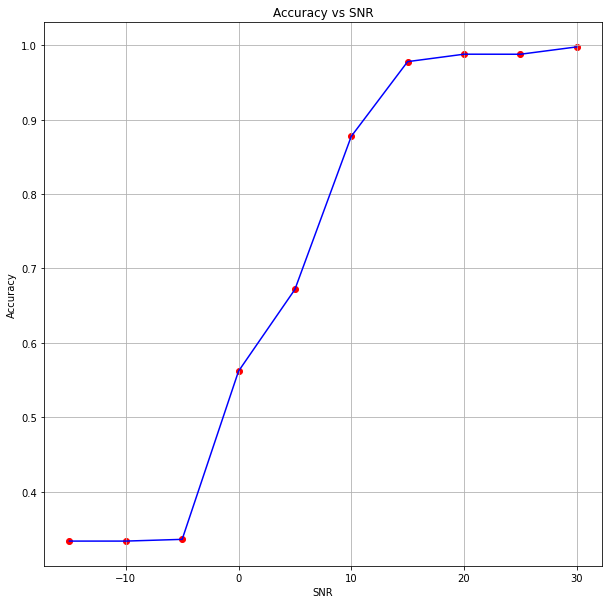

In [37]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=3_RNN.jpg")

Save Model

In [38]:
Rayleigh_Model.save("../Models/Rayleigh_L=3_RNN.h5")

## CNN Model for Rayleigh Data

This part of the code is written to verify the results with CNN.

### Creating a Model

In [39]:
def CreateCNNModel():
    tf.keras.backend.clear_session()
    In = Input(shape=(100,2))
    x = tf.keras.layers.Reshape((100,2,1))(In)
    x = Conv2D(filters=64,kernel_size=(3,1),activation='relu')(x)
    x = Conv2D(filters=16,kernel_size=(3,2),activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    Ou = Dense(3,activation='softmax')(x)

    model = Model(In,Ou)
    model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["acc"])

    return model

### Rayleigh Fading of Channel Length = 2

Importing Data

In [40]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=2)

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 2, 64)         256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 1, 16)         6160      
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387   

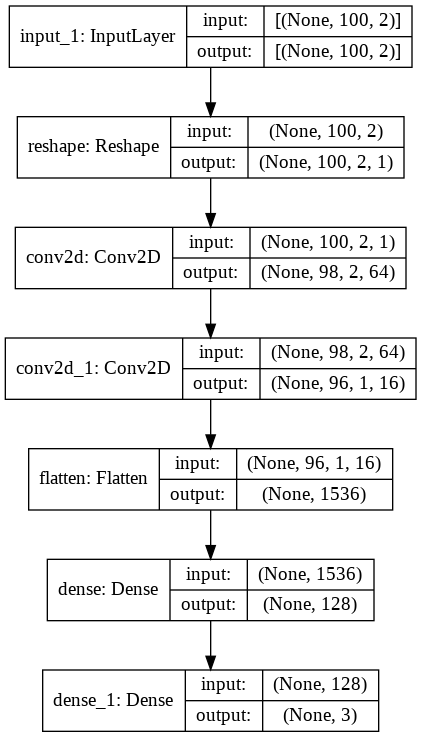

In [41]:
CNNModel = CreateCNNModel()
CNNModel.summary()
tf.keras.utils.plot_model(CNNModel, to_file='../Models/CNN_Rayleigh_Model_L=2.png', show_shapes=True,show_layer_names=True)

Training the Model

In [42]:
CNNModel.fit(X_Train, y_Train, epochs=25, batch_size=16, validation_split=0.2,shuffle=True)

Epoch 1/25
750/750 [==============================] - 3s 3ms/step - loss: 0.1321 - acc: 0.9345 - val_loss: 9.5532e-05 - val_acc: 1.0000
Epoch 2/25
750/750 [==============================] - 2s 3ms/step - loss: 1.1904e-05 - acc: 1.0000 - val_loss: 1.1407e-05 - val_acc: 1.0000
Epoch 3/25
750/750 [==============================] - 2s 3ms/step - loss: 2.5635e-06 - acc: 1.0000 - val_loss: 2.5601e-06 - val_acc: 1.0000
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 1.0195e-06 - acc: 1.0000 - val_loss: 1.1326e-06 - val_acc: 1.0000
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 5.6095e-07 - acc: 1.0000 - val_loss: 6.1997e-07 - val_acc: 1.0000
Epoch 6/25
750/750 [==============================] - 2s 3ms/step - loss: 3.7316e-07 - acc: 1.0000 - val_loss: 3.8564e-07 - val_acc: 1.0000
Epoch 7/25
750/750 [==============================] - 2s 3ms/step - loss: 2.0617e-07 - acc: 1.0000 - val_loss: 2.6127e-07 - val_acc: 1.0000
Epoch 8/25
750/750 [====

Evaluating the Model

Evaluating Model
SNR: -15 Accuracy: 0.3333333432674408
SNR: -10 Accuracy: 0.466866672039032
SNR: -5 Accuracy: 0.6722666621208191
SNR: 0 Accuracy: 0.8591333627700806
SNR: 5 Accuracy: 0.9981333613395691
SNR: 10 Accuracy: 0.9999333620071411
SNR: 15 Accuracy: 0.9999333620071411
SNR: 20 Accuracy: 1.0
SNR: 25 Accuracy: 1.0
SNR: 30 Accuracy: 1.0


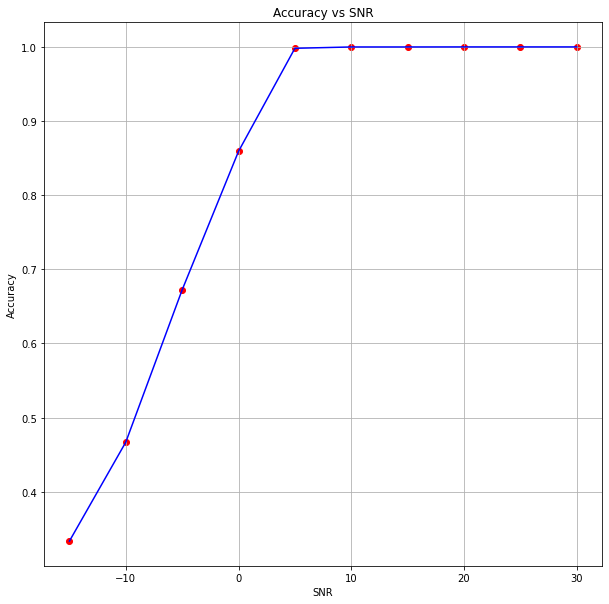

In [43]:
EvaluateData(CNNModel, X_Valid, y_Valid, "../Results/CNN_Rayleigh_Accuracy_L=2.jpg")

Save Model

In [44]:
CNNModel.save("../Models/CNN_Rayleigh_L=2.h5")

### Rayleigh Fading of Channel Length = 3

Importing Data

In [45]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=3)

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 2, 64)         256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 1, 16)         6160      
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387   

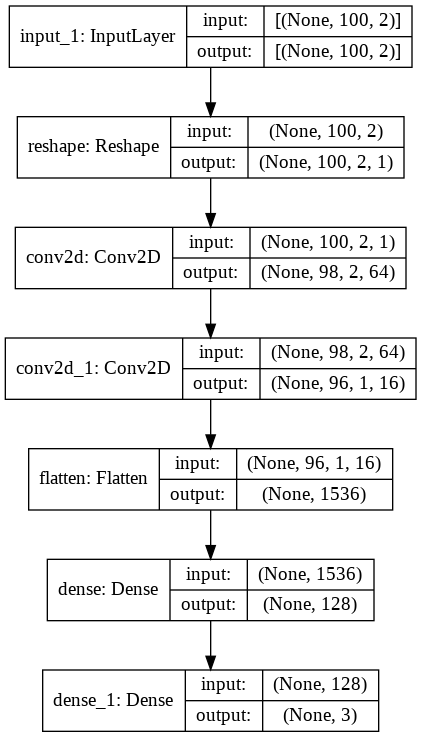

In [46]:
CNNModel = CreateCNNModel()
CNNModel.summary()
tf.keras.utils.plot_model(CNNModel, to_file='../Models/CNN_Rayleigh_Model_L=2.png', show_shapes=True,show_layer_names=True)

Training the Model

In [47]:
CNNModel.fit(X_Train, y_Train, epochs=25, batch_size=16, validation_split=0.2,shuffle=True)

Epoch 1/25
750/750 [==============================] - 3s 3ms/step - loss: 0.2856 - acc: 0.8586 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 2/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0124 - acc: 0.9957 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 3/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0044 - acc: 0.9988 - val_loss: 0.0032 - val_acc: 0.9993
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0065 - acc: 0.9981 - val_loss: 1.2755e-04 - val_acc: 1.0000
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0101 - acc: 0.9966 - val_loss: 4.5438e-04 - val_acc: 0.9997
Epoch 6/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 3.6638e-04 - val_acc: 0.9997
Epoch 7/25
750/750 [==============================] - 2s 3ms/step - loss: 0.0018 - acc: 0.9995 - val_loss: 3.4067e-05 - val_acc: 1.0000
Epoch 8/25
750/750 [==============================] - 2s 3ms

Evaluating the Model

Evaluating Model
SNR: -15 Accuracy: 0.34540000557899475
SNR: -10 Accuracy: 0.3789333403110504
SNR: -5 Accuracy: 0.5217333436012268
SNR: 0 Accuracy: 0.9070000052452087
SNR: 5 Accuracy: 0.9564666748046875
SNR: 10 Accuracy: 0.9875333309173584
SNR: 15 Accuracy: 0.9976000189781189
SNR: 20 Accuracy: 0.9982666373252869
SNR: 25 Accuracy: 0.9990666508674622
SNR: 30 Accuracy: 1.0


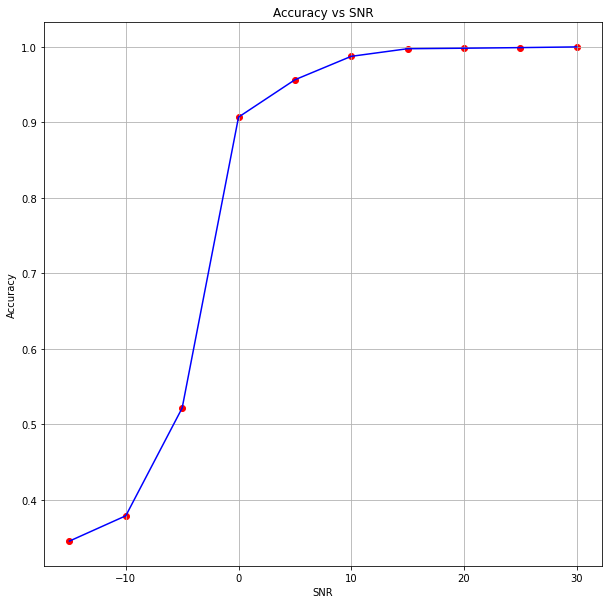

In [48]:
EvaluateData(CNNModel, X_Valid, y_Valid, "../Results/CNN_Rayleigh_Accuracy_L=3.jpg")

Save Model

In [49]:
CNNModel.save("../Models/CNN_Rayleigh_L=3.h5")

## Plot Results

### AWGN Models

Importing Data and Models

In [50]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('AWGN')

AWGN_MLP = tf.keras.models.load_model("../Models/AWGN_MLP.h5")
AWGN_CNN = tf.keras.models.load_model("../Models/AWGN_CNN.h5")

Plotting Results

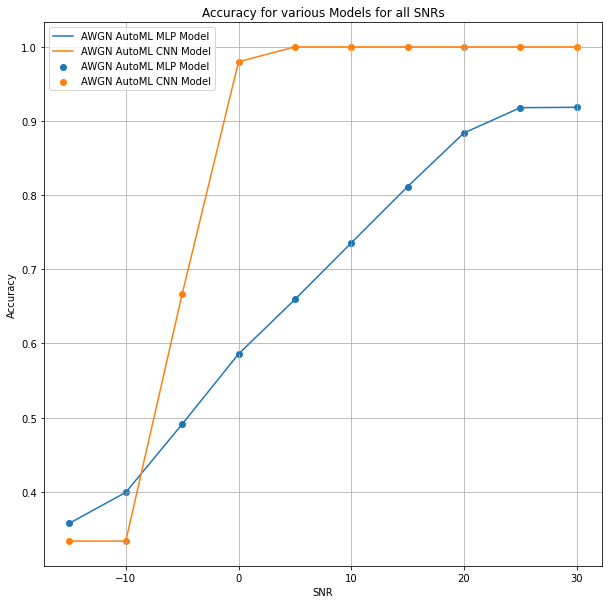

In [51]:
Models = {"AWGN AutoML MLP Model":AWGN_MLP, "AWGN AutoML CNN Model":AWGN_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/AWGN_Accuracies.jpg")

### Rayleigh Models for L = 2


In [52]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=2)

Rayeligh_AutoMLCNN = tf.keras.models.load_model("../Models/Rayleigh_L=2_CNN.h5")
Rayeligh_AutoMLRNN = tf.keras.models.load_model("../Models/Rayleigh_L=2_RNN.h5")
Rayeligh_CNN = tf.keras.models.load_model("../Models/CNN_Rayleigh_L=2.h5")

Plotting Results

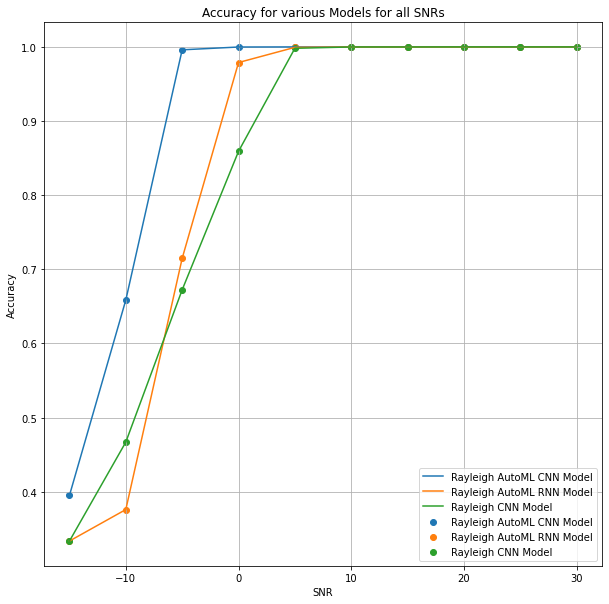

In [53]:
Models = {"Rayleigh AutoML CNN Model":Rayeligh_AutoMLCNN, "Rayleigh AutoML RNN Model":Rayeligh_AutoMLRNN, "Rayleigh CNN Model":Rayeligh_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/Rayleigh_L=2_Accuracies.jpg")

### Rayleigh Models for L = 3


In [54]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=3)

Rayeligh_AutoMLCNN = tf.keras.models.load_model("../Models/Rayleigh_L=3_CNN.h5")
Rayeligh_AutoMLRNN = tf.keras.models.load_model("../Models/Rayleigh_L=3_RNN.h5")
Rayeligh_CNN = tf.keras.models.load_model("../Models/CNN_Rayleigh_L=3.h5")

Plotting Results

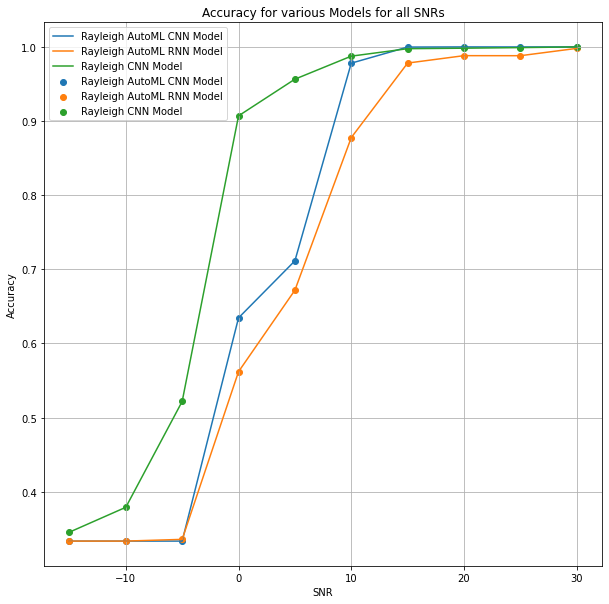

In [55]:
Models = {"Rayleigh AutoML CNN Model":Rayeligh_AutoMLCNN, "Rayleigh AutoML RNN Model":Rayeligh_AutoMLRNN, "Rayleigh CNN Model":Rayeligh_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/Rayleigh_L=3_Accuracies.jpg")